In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
import seaborn as sns

In [2]:
dataset=pd.read_csv("Mall_Customers.csv")
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
# subset of dataset
x=dataset.iloc[:,[3,4]]
x

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [4]:
dataset.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

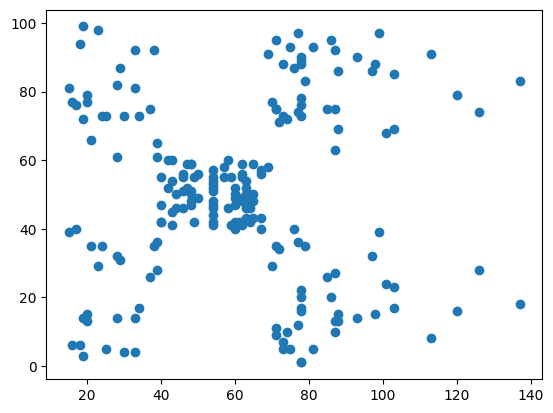

In [5]:
#plot the dataset
plot.scatter(x=dataset['Annual Income (k$)'],y=dataset['Spending Score (1-100)'])

In [6]:
from sklearn.cluster import OPTICS
op=OPTICS(eps=8,min_samples=5)
y_label=op.fit_predict(x)
y_label

array([-1,  5,  8,  5, -1,  5,  8, -1,  8,  5,  8, -1,  8,  5,  8,  5,  0,
        5,  0, -1,  0,  5,  8,  5,  8, -1,  0, -1,  0, -1,  8,  5,  8, -1,
        8, -1, -1, -1, -1,  5, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1,  1,
       -1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  1,  1, -1,  2,  2, -1,  2, -1,  2,  2, -1, -1,  2,
       -1, -1,  2, -1,  3, -1,  4,  3,  4,  4, -1,  3,  3,  4,  3,  4,  3,
       -1, -1, -1,  4,  3,  3,  4,  3,  3, -1,  4,  3,  3,  3,  4, -1, -1,
       -1, -1, -1, -1, 10, -1,  9, -1, 10, -1,  9,  6,  9, -1,  9,  6, 10,
        6,  9,  6,  9,  6, 10, -1, 10, -1, 10, -1,  9, -1, 10, -1, 10, -1,
        9, -1, 10,  6,  9,  6,  9, -1,  9,  6, 10,  7, -1,  7, 10,  7, -1,
        7, -1,  7, 10,  7, 10,  7, -1,  7, -1, -1, -1,  7, -1, -1, -1,  7,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

In [7]:
from sklearn.metrics import silhouette_score
sil_score=silhouette_score(x,y_label)
sil_score

np.float64(0.04036794054999629)

In [8]:
supervised=pd.DataFrame(dataset)
supervised["clustering group"]=y_label
supervised

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),clustering group
0,1,Male,19,15,39,-1
1,2,Male,21,15,81,5
2,3,Female,20,16,6,8
3,4,Female,23,16,77,5
4,5,Female,31,17,40,-1
...,...,...,...,...,...,...
195,196,Female,35,120,79,-1
196,197,Female,45,126,28,-1
197,198,Male,32,126,74,-1
198,199,Male,32,137,18,-1


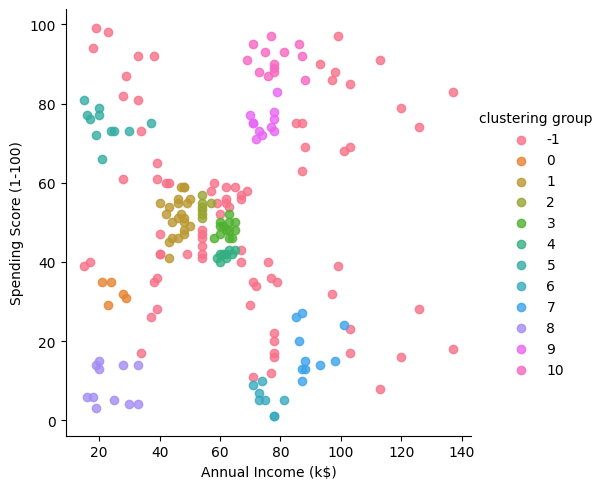

In [9]:
sns.lmplot(supervised,x=supervised.columns[3],y=supervised.columns[4],hue=supervised.columns[5],fit_reg=False)